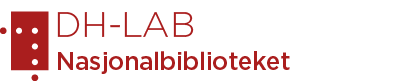

In [24]:
#import dhlab.graph_networkx_louvain as gnl
# import dhlab.legacy.nbtext as nb
import dhlab.ngram.nb_ngram as nb
from dhlab.module_update import css
import networkx as nx
%matplotlib inline
plot = lambda x, lw=5: x.plot(figsize=(10,5), lw=lw)

# import dhlab.module_update as mu

# mu.update('graph_networkx_louvain')

import graph_networkx_louvain as gnl

Kapittel 4a er her: https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/4%20a_N-gram_og_galakser_%C3%A5pen.ipynb

# 1. N-gramdata

Data kan hentes fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) med kommandoen `nb_ngram(<ord>, periode)`. Dataene utgjør en **dataramme** som kan analyseres og plottes. 


`smooth` er et parameter for glatting. Forekomsten av et ord er til en viss grad styrt av tilfeldigheter, for eks. hvilke bøker som ble utgitt ett bestemt år: For å rette noe på denne skjevheten, «glattes» resultatene ut før de vises. Glatting vil si at relativfrekvensen for ett år beregnes som et gjennomsnitt av frekvensen i dette og et visst antall forutgående og etterfølgende år: En glatting på fire innebærer at resultatene for fire år før og fire år etter legges sammen med dem for det aktuelle året, delt på ni (antall år totalt). Dette gjør kurvene jevnere enn i rådataene hvor det er langt mer spisse topper.

`corpus` er satt til *bok* som default, skriv `corpus='avis'` for å søke i aviser.

In [25]:
nb.nb_ngram('han, hun', smooth=1, years=(1950, 1990)).head(10)

,han,hun
1950,0.961575,0.376442
1951,0.990294,0.370878
1952,0.946277,0.390889
1953,0.965377,0.377961
1954,0.803514,0.321345
1955,0.784965,0.282004
1956,0.749096,0.259196
1957,0.704999,0.272920
1958,0.843481,0.337469
1959,0.934894,0.351016


## 1.1. Plotting

Lag en figur med egendefinert (se over) kommando `plot(<ngram dataramme>)` eller bruk innebygd Python `<ngram>.plot(...)`

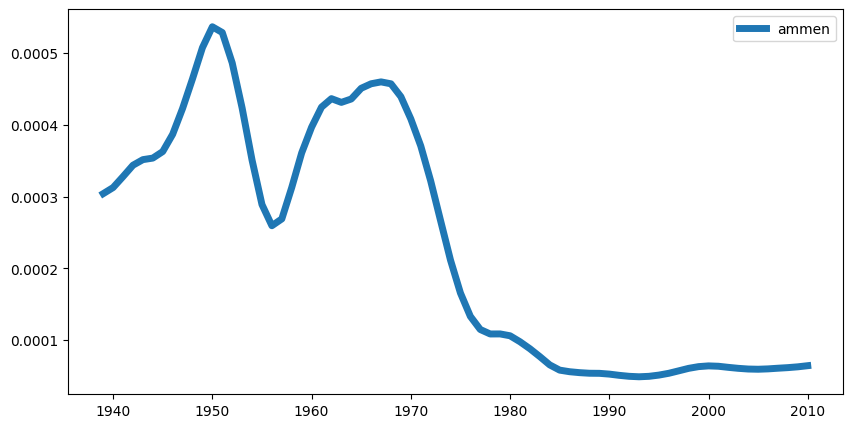

In [26]:
plot(nb.nb_ngram("ammen", smooth=10, years=(1930, 2010)));

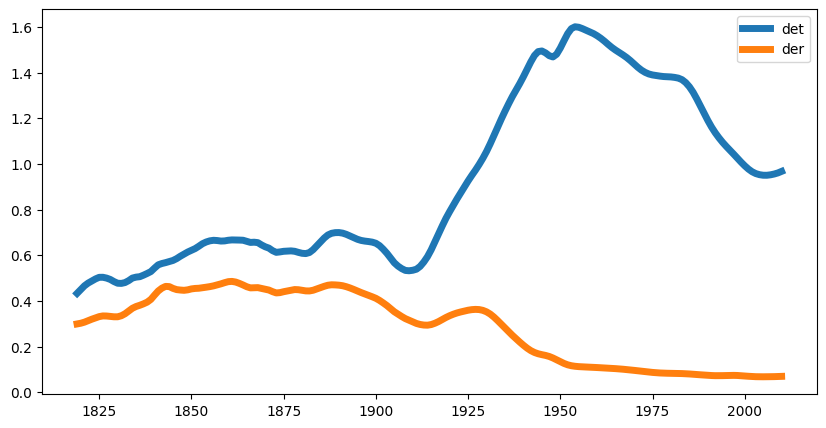

In [27]:
plot(nb.nb_ngram("det, der", smooth=10, corpus='avis', years=(1810, 2010)));

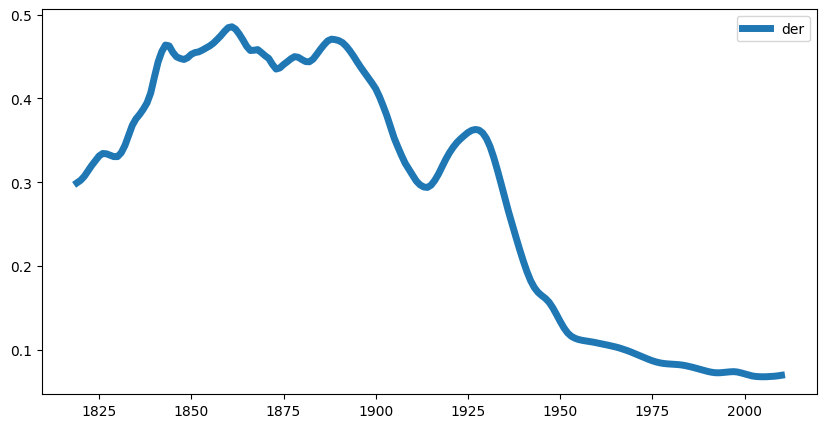

In [28]:
plot(nb.nb_ngram("der", smooth=10, corpus='avis', years=(1810, 2010)));

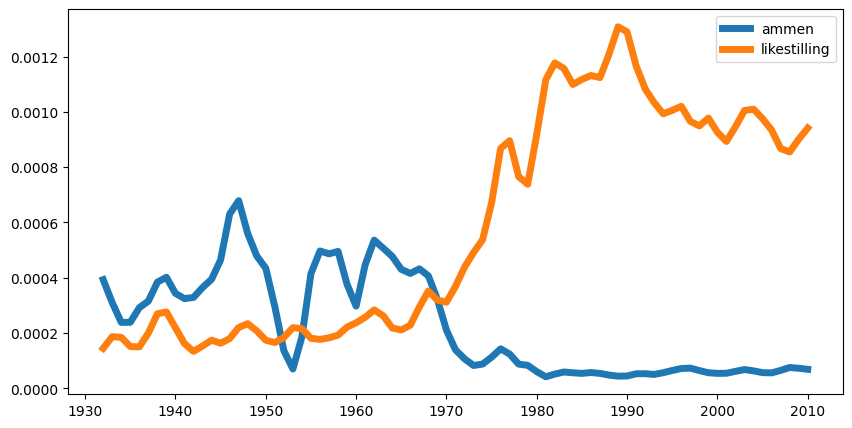

In [29]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1930, 2010)));

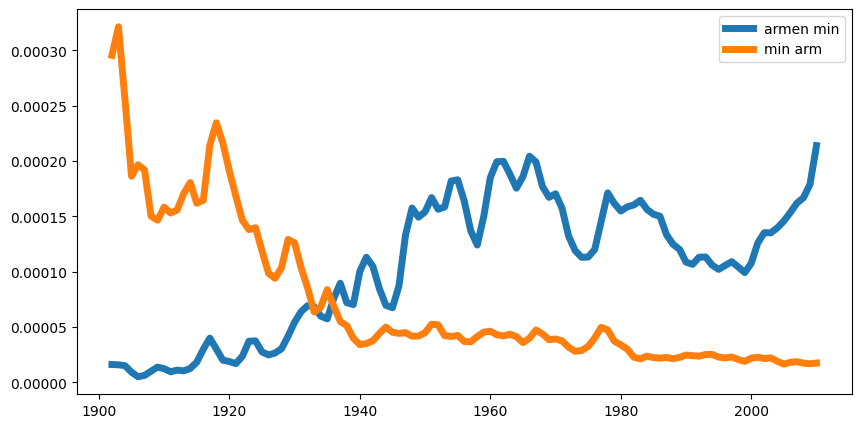

In [30]:
plot(nb.nb_ngram("armen min, min arm", smooth=3, years=(1900, 2010)));

<AxesSubplot: >

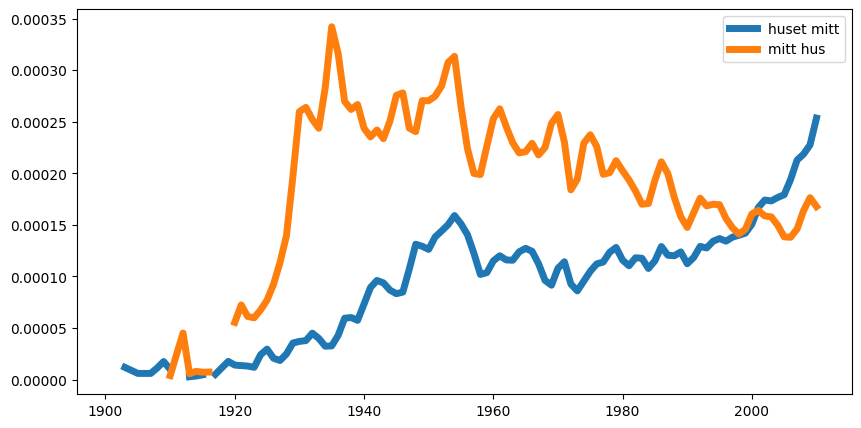

In [31]:
plot(nb.nb_ngram("huset mitt, mitt hus", smooth=3, years=(1900, 2010)))

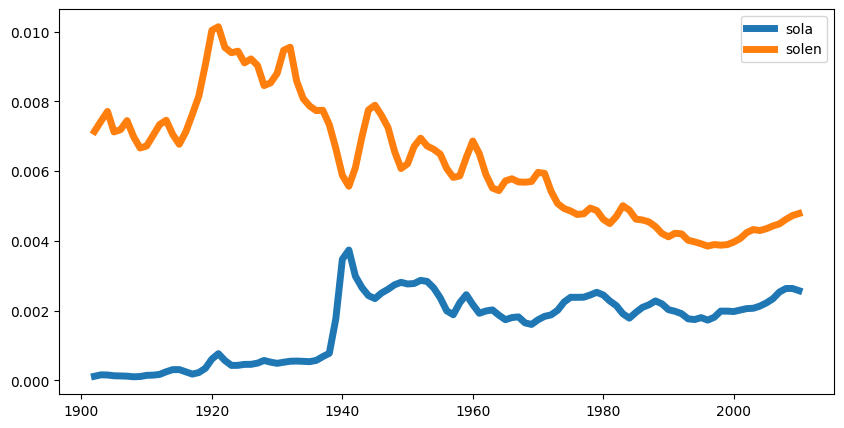

In [32]:
plot(nb.nb_ngram("sola, solen", smooth=3, years=(1900, 2010)));

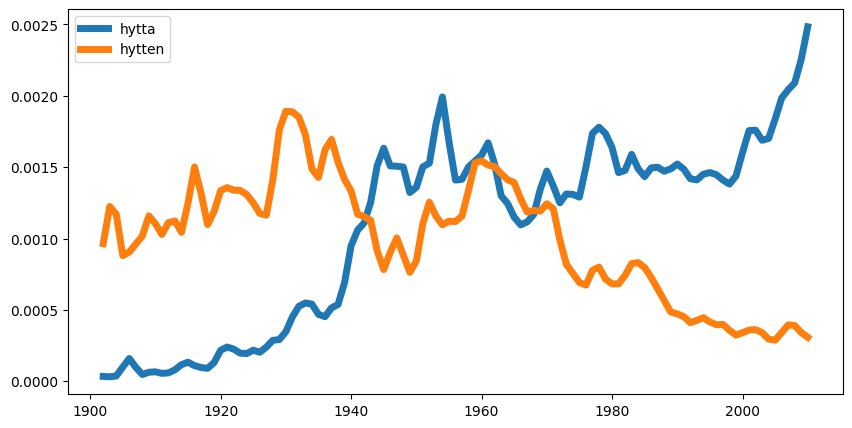

In [33]:
plot(nb.nb_ngram("hytta, hytten", smooth=3, years=(1900, 2010)));

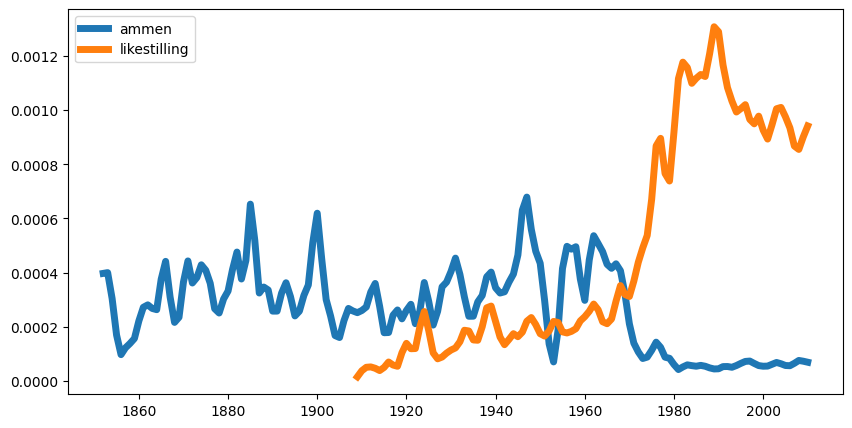

In [34]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1850, 2010)));

## 1.2. N-gram med jokertegn

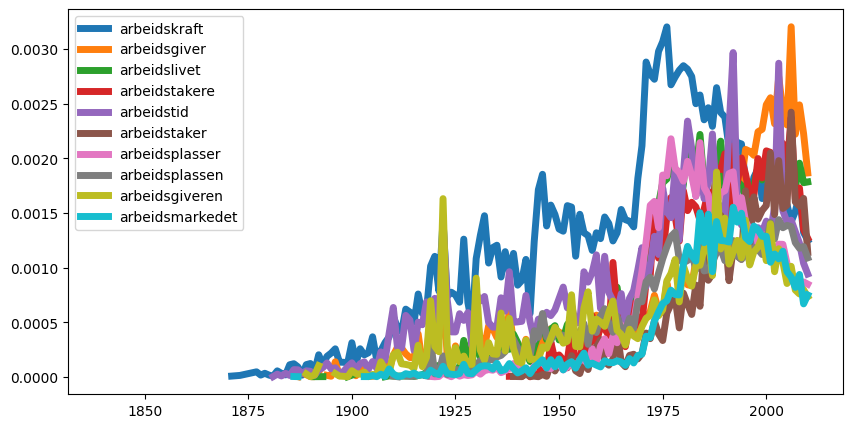

In [35]:
plot(nb.nb_ngram("arbeids*"));

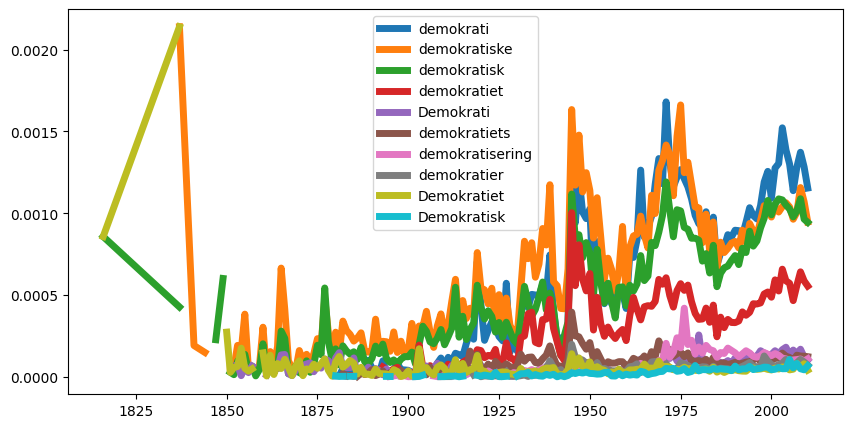

In [38]:
plot(nb.nb_ngram('demokrati*'));

# 2. Galakser


Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.

For engelsk og tysk er grunnlagsmaterialet [Google n-gram](https://books.google.com/ngrams/graph?content=democracy&year_start=1800&year_end=2000&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Cdemocracy%3B%2Cc0).

Kommanden er `make_graph(<ord>, lang=<språk-kode>)`

## 2.1. Definer koblinger til *is*

I eksemplet ser vi på **is** is engelsk, tysk og norsk, og hvordan språkene grupperer ordet.

### 2.1.1. Engelsk

In [37]:
ice = nb.make_graph('ice', lang = 'eng')

AttributeError: module 'dhlab.ngram.nb_ngram' has no attribute 'make_graph'

#### 2.1.1.1. Se på grafen

Grafer tegnes og analyseres med pakken [networkx](https://networkx.github.io/). Kommandoer er bygd over den pakken, og kommando for å vise grafen er `show_graph` fra modulen `graph_networkx_louvain`.

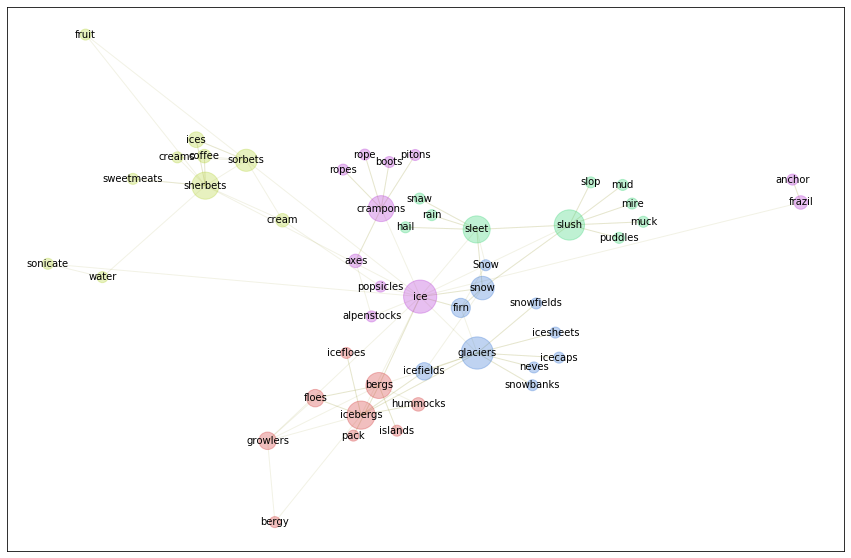

In [ ]:
gnl.show_graph(ice, spread = 0.5)

#### 2.1.1.2. Clustre fra grafen

Bruk kommando `show_communities` fra `gnl` for å se på clustre.

In [ ]:
gnl.show_communities(ice)

ice-frazil :  ice, frazil, sonicate, water, anchor, popsicles

sleet-snow :  sleet, snow, firn, icefields, rain, hail, Snow, snaw

icebergs-bergs :  icebergs, bergs, floes, growlers, hummocks, islands, pack, bergy, icefloes

slush-mud :  slush, mud, muck, slop, mire, puddles

sherbets-sorbets :  sherbets, sorbets, ices, cream, coffee, creams, sweetmeats, fruit

crampons-axes :  crampons, axes, boots, pitons, rope, alpenstocks, ropes

glaciers-snowbanks :  glaciers, snowbanks, icecaps, neves, snowfields, icesheets



### 2.1.2. Tysk

In [ ]:
Eis = nb.make_graph('Eis', lang='ger')

#### 2.1.2.1. Se på grafen

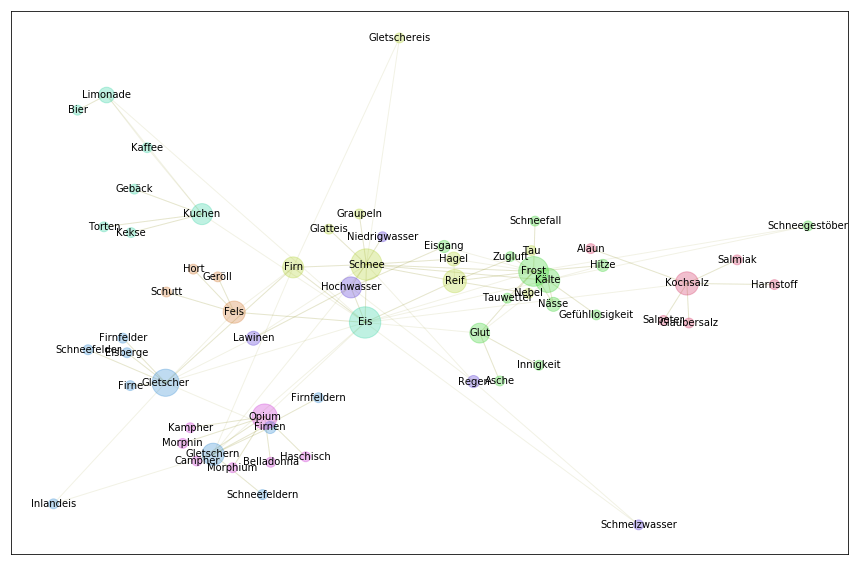

In [ ]:
gnl.show_graph(Eis, spread=0.5)

#### 2.1.2.2. Clustre fra grafen / Tysk har narko-lesning



In [ ]:
gnl.show_communities(Eis)

Schnee-Reif :  Schnee, Reif, Firn, Hagel, Graupeln, Tau, Glatteis, Gletschereis, Nebel

Frost-Kälte :  Frost, Kälte, Glut, Nässe, Hitze, Eisgang, Schneegestöber, Gefühllosigkeit, Schneefall, Asche, Innigkeit, Tauwetter, Zugluft

Eis-Hochwasser :  Eis, Hochwasser, Regen, Niedrigwasser, Schmelzwasser

Gletscher-Gletschern :  Gletscher, Gletschern, Lawinen, Firnen, Schneefelder, Inlandeis, Eisberge, Schneefeldern, Firnfelder, Firnfeldern, Firne

Kuchen-Limonade :  Kuchen, Limonade, Torten, Kekse, Gebäck, Kaffee, Bier

Opium-Morphium :  Opium, Morphium, Kampher, Belladonna, Campher, Haschisch, Morphin

Kochsalz-Harnstoff :  Kochsalz, Harnstoff, Alaun, Salpeter, Salmiak, Glaubersalz

Fels-Hort :  Fels, Hort, Schutt, Geröll



### 2.1.3. Norsk

More than one word can be added

In [ ]:
g_is = nb.make_graph('is', lang='nob')

#### 2.1.3.1. Se på grafen

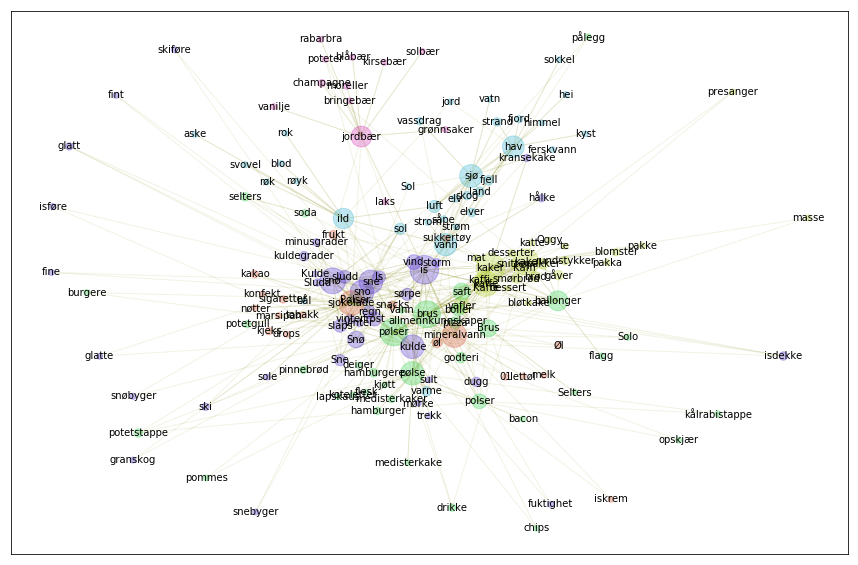

In [ ]:
gnl.show_graph(g_is, spread=0.8)

#### 2.1.3.2. Clustre fra grafen

In [ ]:
gnl.show_communities(g_is)

kaker-kake :  kaker, kake, kaffe, saft, vafler, kaffi, brød, pakker, smørbrød, gåver, snitter, Kaffe, rundstykker, mat, desserter, blomster, te, bløtkake, presanger, pakka, Oggy, katte, Kaffi, masse, pakke, dessert

pølser-brus :  pølser, brus, pølse, ballonger, Brus, polser, Pølser, boller, pizza, godteri, potetstappe, selters, hamburgere, potetgull, hamburger, kakao, drikke, soda, pinnebrød, medisterkaker, Vann, bacon, chips, burgere, Solo, medisterkake, opskjær, kålrabistappe, deiger, flagg, kjøtt, koteletter, pommes, Selters, flesk, pålegg, lapskaus

sjø-vann :  sjø, vann, hav, ild, luft, sol, land, varme, fjell, elver, skog, strand, vassdrag, fjord, elv, aske, såpe, strøm, røyk, svovel, vatn, røk, himmel, jord, kyst, blod, hei, ferskvann, sokkel, bål, rok, strom, Sol

is-snø :  is, snø, sne, kulde, sno, Snø, vind, frost, Is, slaps, sludd, regn, sørpe, Sne, dugg, vinter, kuldegrader, storm, isdekke, Vinter, hålke, Sludd, glatt, ski, minusgrader, kransekake, isføre, skiføre, Kulde, 

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewver.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)